In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import warnings

In [2]:
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
iris = load_iris()

In [4]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [5]:
df = pd.DataFrame(iris.data,columns = iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [6]:
df['target'] = iris.target

In [7]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train,x_test,y_train,y_test = train_test_split(iris.data,iris.target,test_size = 0.2,random_state= 20)

In [10]:
len(x_test)

30

In [11]:
len(x_train)

120

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [13]:
models_params = {
    'logistic':{
        'model' : LogisticRegression(),
        'params' :{
            'C' : [5,10,20],
            'max_iter': [1000]
        }
    },
    'gaussian' : {
        'model' : GaussianNB(),
        'params' :{}
    },
    'multinomial' : {
        'model' : MultinomialNB(),
        'params' : {}
    },
    'decisiontree' : {
        'model' : DecisionTreeClassifier(),
        'params' : {
            'criterion' : ['gini','entropy']
        }
    },
    'SVM' : {
        'model' : SVC(),
        'params' : {
            'C' : [5,10,20],
            'kernel' : ['linear','poly','rbf','sigmoid']
        }
    },
    'randomforest' : {
        'model' : RandomForestClassifier(),
        'params' : {
            'n_estimators' : [10,20,30]
        }
    },
    'knn' : {
        'model' : KNeighborsClassifier(),
        'params' : {
            'n_neighbors' : [5,10,20]
        }
    }
}

In [14]:
scores = []
for model_name,mp in models_params.items():
    model = GridSearchCV(mp['model'],mp['params'],cv=5,return_train_score=False)
    model.fit(x_train,y_train)
    scores.append({
        'model' : model_name,
        'score' : model.best_score_,
        'parameters' : model.best_params_
    })

In [15]:
new_df = pd.DataFrame(scores,columns=['model','score','parameters'])
new_df

,model,score,parameters
0,logistic,0.975000,"{'C': 5, 'max_iter': 1000}"
1,gaussian,0.958333,{}
2,multinomial,0.975000,{}
3,decisiontree,0.966667,{'criterion': 'gini'}
4,SVM,0.975000,"{'C': 10, 'kernel': 'rbf'}"
5,randomforest,0.966667,{'n_estimators': 20}
6,knn,0.975000,{'n_neighbors': 5}


In [16]:
new_df['score'].max()

0.975

In [17]:
logistic = LogisticRegression(C=5,max_iter=1000)
logistic.fit(x_train,y_train)

LogisticRegression(C=5, max_iter=1000)

In [18]:
logistic.score(x_test,y_test)

0.9666666666666667

In [19]:
logistic.predict(x_test)

array([0, 1, 1, 2, 1, 1, 2, 0, 2, 0, 2, 1, 2, 0, 0, 2, 0, 1, 2, 1, 1, 2,
       2, 0, 1, 1, 1, 0, 2, 1])

In [20]:
y_test

array([0, 1, 1, 2, 1, 1, 2, 0, 2, 0, 2, 1, 2, 0, 0, 2, 0, 1, 2, 1, 1, 2,
       2, 0, 1, 1, 1, 0, 2, 2])

In [21]:
from sklearn.metrics import confusion_matrix

y_predict = logistic.predict(x_test)
cm = confusion_matrix(y_test,y_predict)

In [22]:
cm

array([[ 8,  0,  0],
       [ 0, 11,  0],
       [ 0,  1, 10]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

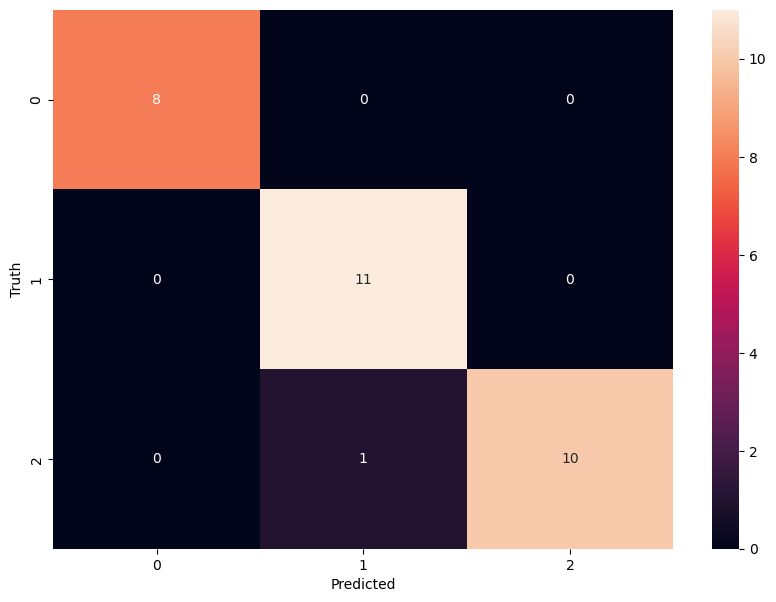

In [23]:
import seaborn as sn
import matplotlib.pyplot as plt
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')